In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('loan_detection.csv')
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [3]:
# Display dataset info
def data_overview(data):
    print("Data Shape:", data.shape)
    print("Columns:\n", data.columns.tolist())
    print("\nMissing Values:\n", data.isna().sum())
    print("\nSample Data:\n", data.head())
data_overview(df)

Data Shape: (41188, 60)
Columns:
 ['age', 'campaign', 'pdays', 'previous', 'no_previous_contact', 'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'pou

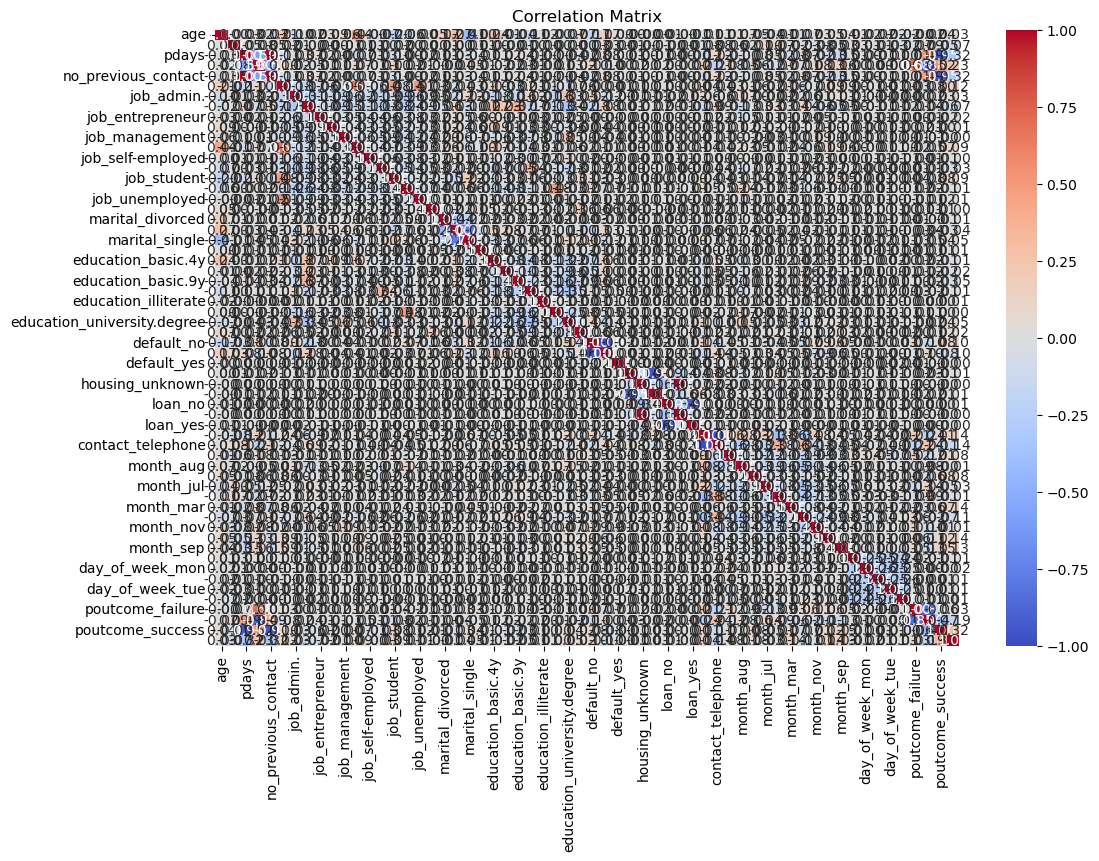

In [69]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

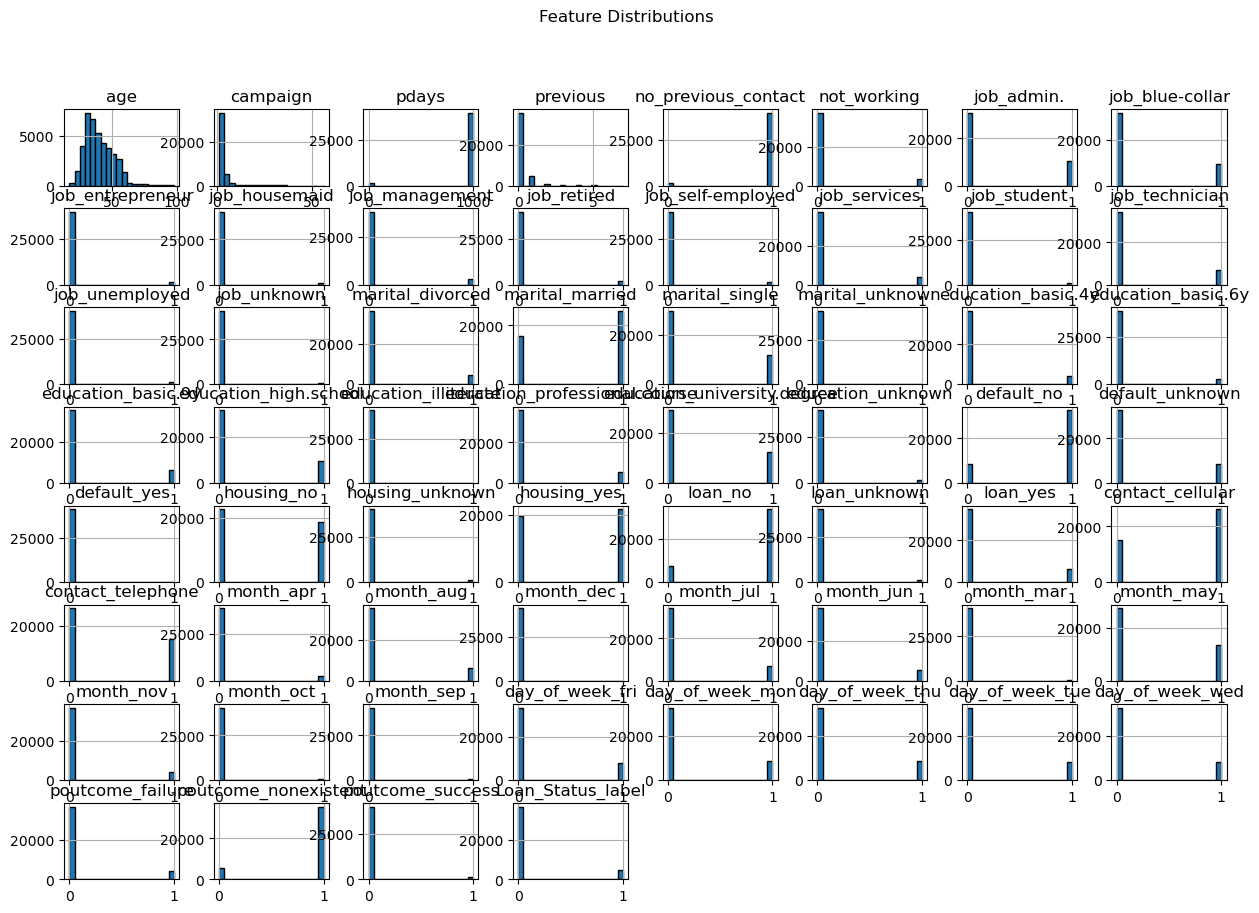

In [71]:
# Distribution of numerical features
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

In [4]:
# Target column analysis
print("\nTarget Value Counts:\n", df['Loan_Status_label'].value_counts())


Target Value Counts:
 Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64


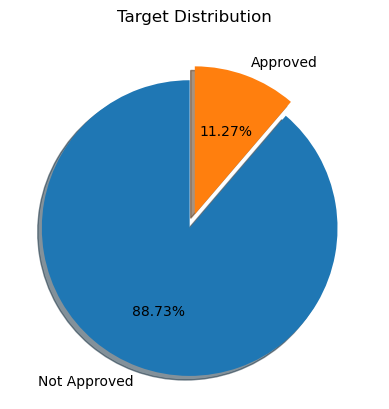

In [5]:
plt.pie(df['Loan_Status_label'].value_counts(), labels=['Not Approved', 'Approved'], autopct='%1.2f%%', startangle=90, shadow=True, explode=[0.1, 0])
plt.title('Target Distribution')
plt.show()

In [6]:
X = df.drop(columns=['Loan_Status_label'])

In [7]:
y = df['Loan_Status_label']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Initialize models
lr = LogisticRegression()

In [11]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)

In [12]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [13]:
# Train Logistic Regression
lr.fit(X_train, y_train)
lr_train_acc = lr.score(X_train, y_train)
lr_test_acc = lr.score(X_test, y_test)

In [14]:
print(f"Logistic Regression - Training Accuracy: {lr_train_acc*100:.2f}%, Test Accuracy: {lr_test_acc*100:.2f}%")

Logistic Regression - Training Accuracy: 89.81%, Test Accuracy: 89.57%


In [15]:
# Train Decision Tree
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [16]:
dtree_train_acc = dtree.score(X_train, y_train)
dtree_test_acc = dtree.score(X_test, y_test)

In [17]:
print(f"Decision Tree - Training Accuracy: {dtree_train_acc*100:.2f}%, Test Accuracy: {dtree_test_acc*100:.2f}%")

Decision Tree - Training Accuracy: 90.14%, Test Accuracy: 89.45%


In [18]:
# Train XGBoost
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [19]:
xgb_train_acc = xgb.score(X_train, y_train)
xgb_test_acc = xgb.score(X_test, y_test)

In [20]:
print(f"XGBoost - Training Accuracy: {xgb_train_acc*100:.2f}%, Test Accuracy: {xgb_test_acc*100:.2f}%")

XGBoost - Training Accuracy: 92.17%, Test Accuracy: 89.29%


In [21]:
# Model Evaluation - XGBoost
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)


Confusion Matrix - Train:


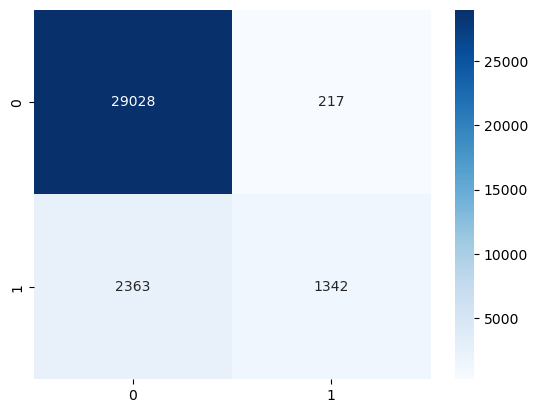

In [22]:
print("\nConfusion Matrix - Train:")
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', cmap='Blues')
plt.show()


In [23]:
print("\nClassification Report - Train:\n", classification_report(y_train, y_pred_train))



Classification Report - Train:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     29245
           1       0.86      0.36      0.51      3705

    accuracy                           0.92     32950
   macro avg       0.89      0.68      0.73     32950
weighted avg       0.92      0.92      0.91     32950




Confusion Matrix - Test:


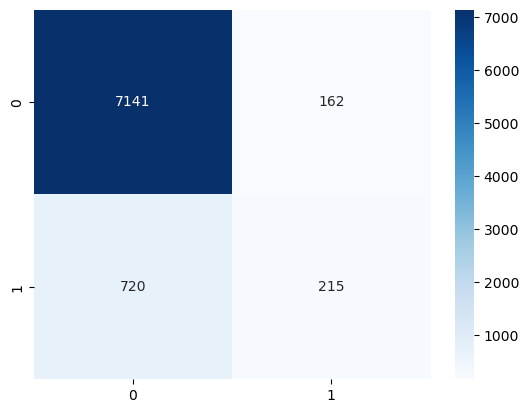

In [24]:
print("\nConfusion Matrix - Test:")
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.show()

In [25]:
print("\nClassification Report - Test:\n", classification_report(y_test, y_pred_test))


Classification Report - Test:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.57      0.23      0.33       935

    accuracy                           0.89      8238
   macro avg       0.74      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



In [77]:
# Find misclassified instances
misclassified = X_test[y_test != y_pred_test]
print("\nMisclassified Instances:\n", misclassified)


Misclassified Instances:
 [[ 0.28580588 -0.56620036  0.19466067 ... -0.34048171  0.39837381
  -0.18496534]
 [ 1.53153166  0.15371713  0.19466067 ... -0.34048171  0.39837381
  -0.18496534]
 [ 0.57328106 -0.56620036  0.19466067 ...  2.93701532 -2.51020518
  -0.18496534]
 ...
 [ 2.3939572  -0.56620036  0.19466067 ... -0.34048171  0.39837381
  -0.18496534]
 [-1.24739509 -0.56620036  0.19466067 ... -0.34048171  0.39837381
  -0.18496534]
 [-0.86409485 -0.20624161  0.19466067 ... -0.34048171  0.39837381
  -0.18496534]]


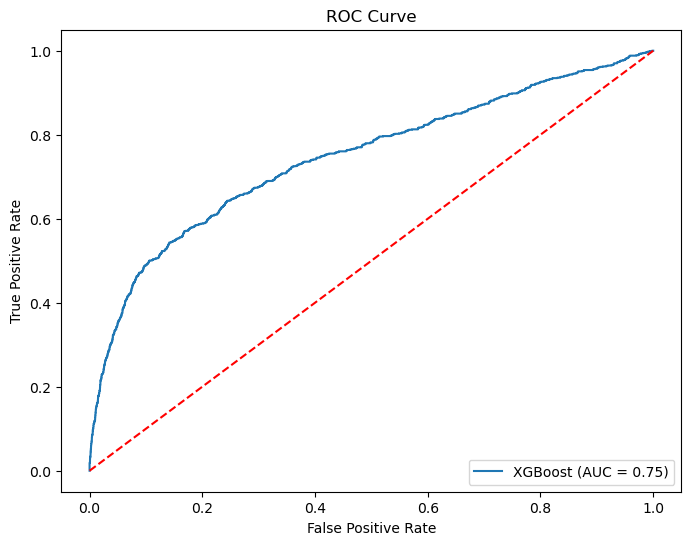

In [73]:
from sklearn.metrics import roc_curve, auc

# ROC-AUC for XGBoost
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [26]:
# Hyperparameter tuning for XGBoost
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0.1, 0.5, 1],
    'reg_lambda': [0.1, 0.5, 1]
}

In [27]:
grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                           param_grid=params, scoring='accuracy', cv=3, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total t

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'reg_alpha': [0.1, 0.5, 1],
                         'reg_lambda': [0.1, 0.5, 1]},
             scoring='accuracy', verbose=2)

In [67]:
 print("\nBest Parameters from GridSearchCV:\n", grid_search.best_params_)


Best Parameters from GridSearchCV:
 {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.5}


In [29]:
# Evaluate the best model
y_pred_gs_test = grid_search.predict(X_test)

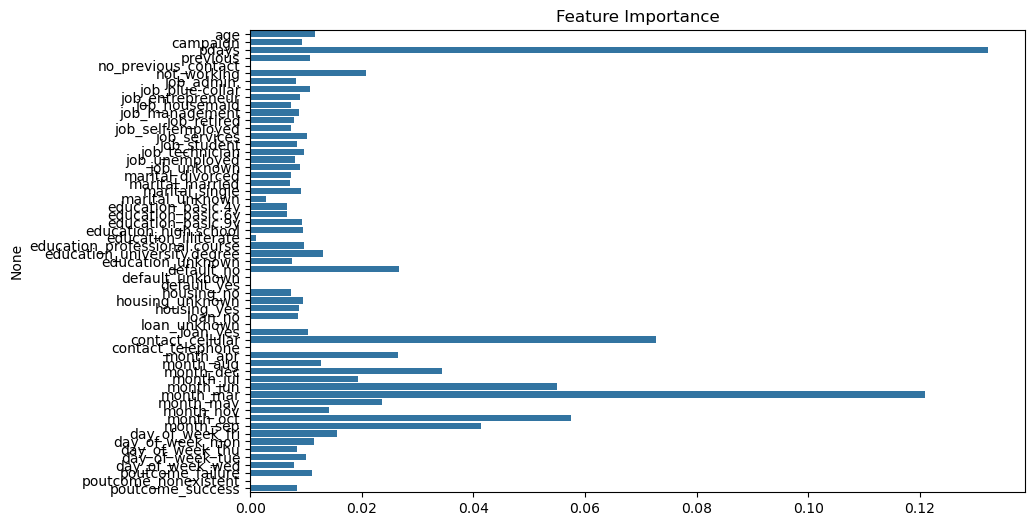

In [75]:
# Feature importance for XGBoost
importance = xgb.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance')
plt.show()


Confusion Matrix - Best Model (Test):


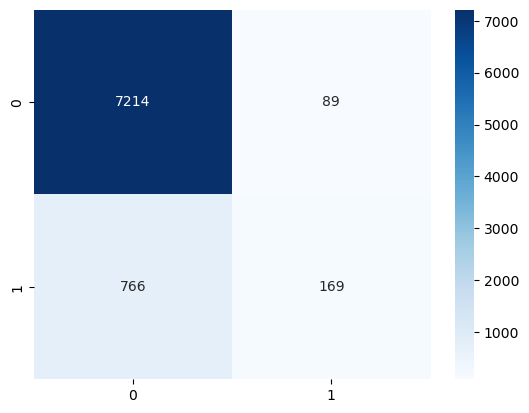

In [30]:
print("\nConfusion Matrix - Best Model (Test):")
sns.heatmap(confusion_matrix(y_test, y_pred_gs_test), annot=True, fmt='d', cmap='Blues')
plt.show()

In [31]:
print("\nClassification Report - Best Model (Test):\n", classification_report(y_test, y_pred_gs_test))


Classification Report - Best Model (Test):
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.66      0.18      0.28       935

    accuracy                           0.90      8238
   macro avg       0.78      0.58      0.61      8238
weighted avg       0.88      0.90      0.87      8238



In [79]:
import joblib

# Save the best XGBoost model
joblib.dump(grid_search.best_estimator_, 'xgb_model.pkl')
print("Best XGBoost model saved as 'xgb_model.pkl'")


Best XGBoost model saved as 'xgb_model.pkl'
